In [40]:
import pandas as pd
import numpy as np

In [41]:
spam = pd.read_csv('./data/spam.csv')  

In [42]:
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [43]:
spam['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [44]:
spam['Spam'] = spam['Category'].apply(lambda x: 1 if x == 'ham' else 0)

In [45]:
spam.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives around here though",1


## Naive Model

### CountVectorizer 

In [46]:
X = spam['Message']
y = spam['Spam']

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

cv = CountVectorizer()
X_cv = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.2, random_state=42)

### MultinomialNB

In [48]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [49]:
nb.fit(X_train, y_train)

MultinomialNB()

In [50]:
nb.score(X_test, y_test)

0.9856502242152466

In [51]:
y_pred = nb.predict(X_cv)

In [52]:
spam['Prediction'] = y_pred

In [53]:
spam

,Category,Message,Spam,Prediction
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",1,1
1,ham,Ok lar... Joking wif u oni...,1,1
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,0,0
3,ham,U dun say so early hor... U c already then say...,1,1
4,ham,"Nah I don't think he goes to usf, he lives around here though",1,1
...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",0,0
5568,ham,Will ü b going to esplanade fr home?,1,1
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",1,1
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,1,1


In [62]:
phr = cv.transform(['Dear Sir'])
prediction = nb.predict(phr)
print(prediction)

[1]


## Confusion matrix

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_pred)

In [77]:
cm

array([[ 722,   25],
       [  18, 4807]], dtype=int64)

In [75]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['spam', 'ham'])

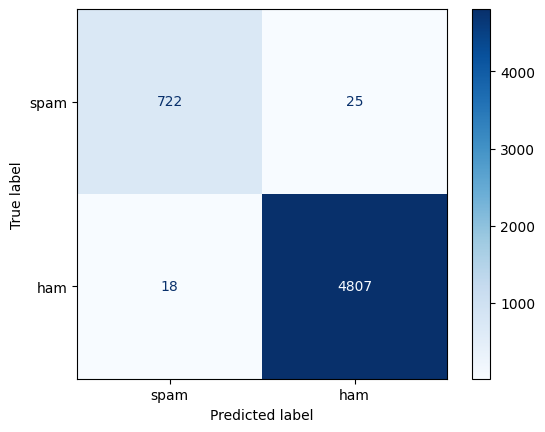

In [76]:
import matplotlib.pyplot as plt

cm_display.plot(cmap=plt.cm.Blues)
plt.show()